# Caldero Solver

## Formula

Deonte by $d$ the number of diplomas you have
$$
\begin{align*}
E_i(\alpha) & = \max\left\{\sum_{j=1}^{12}\alpha_j v_{i,j},0\right\}
\; 1.1^{\sum_{j=1}^{12}\alpha_j b_{i,j}},\\
\hat{E}_i(\alpha)&= 20\,\frac{E_i(\alpha)}{\sum_{k=1}^{d}E_k(\alpha)}\sqrt{\sum_{j=1}^{12}\alpha_j},\\
F(\alpha)&=\sum_{i=1}^{d} w_i\,\hat{E}_i(\alpha),
\end{align*}
$$
where $W=(v_{i,j}),B=(b_{i,j})\in\mathbb{R}^{d\times 12}$ are constant values, $w=(w_i)\in[0,1]^d$ is the weights(interest) in the $i$-effect. and $\alpha \in \{\alpha \in \mathbb{Z}_{26}: |\alpha|\leq 25\}$ are the number of ingredients. 

In [2]:
import numpy as np
import pandas as pd

from cauldron_optimizer.optimizer.optimizer import CauldronOptimizer
from cauldron_optimizer.constants import EFFECT_NAMES

pd.set_option("display.max_columns", None)

In [3]:
B = pd.read_csv('cauldron_optimizer/optimizer/B_values.csv')
V = pd.read_csv('cauldron_optimizer/optimizer/V_values.csv')
B.index = EFFECT_NAMES
V.index = EFFECT_NAMES
B.T

,Monedas,Provisiones,Cuartel Fuerza,Ordinarios Básicos,Ordinarios Refinados,Ordinarios Preciosos,Entrenamiento Fuerza,Portal,Orcos,Maná,Mercenarios Fuerza,Semillas,Sensitivos Básicos,Sensitivos Refinados,Sensitivos Preciosos,Entrenamiento Salud,Mercenarios Salud,Unurium,Ascendidos Básicos,Ascendidos Refinados,Ascendidos Preciosos,Cuartel Salud,Trabajo Comunitario,Productos en Conserva
Espora,0,1,-1,0,2,-2,0,0,1,0,0,0,0,0,0,1,-1,2,0,0,0,1,-2,0
Escarabanuez,0,1,-2,0,1,0,2,0,-1,0,0,0,0,1,-1,0,0,0,1,-2,2,0,0,0
Cascaron de Mana,0,-1,0,0,1,0,1,0,-2,2,0,0,0,0,0,2,1,0,0,0,0,1,-1,-2
Iris,0,-2,0,0,-1,0,1,2,0,1,0,0,-2,2,1,0,0,0,1,-1,0,0,0,0
Huevo,0,0,0,2,-2,0,-1,1,0,1,0,0,0,0,0,0,1,-2,0,0,0,2,1,-1
Lima,0,0,0,1,0,0,-2,1,0,-1,2,0,-1,0,1,0,0,0,2,1,-2,0,0,0
Flor de hierba mora,0,0,0,1,0,0,0,-1,0,-2,1,2,0,0,0,-2,2,-1,0,0,0,0,1,1
Lenguas,2,0,0,-1,0,0,0,-2,0,0,1,1,1,-2,2,0,0,0,0,1,-1,0,0,0
Brote ocular,1,0,0,-2,0,2,0,0,-1,0,-1,1,0,0,0,-1,0,1,0,0,0,-2,2,1
Hoja,1,0,2,0,0,1,0,0,0,0,-2,-1,1,-1,0,0,0,0,-2,2,1,0,0,0


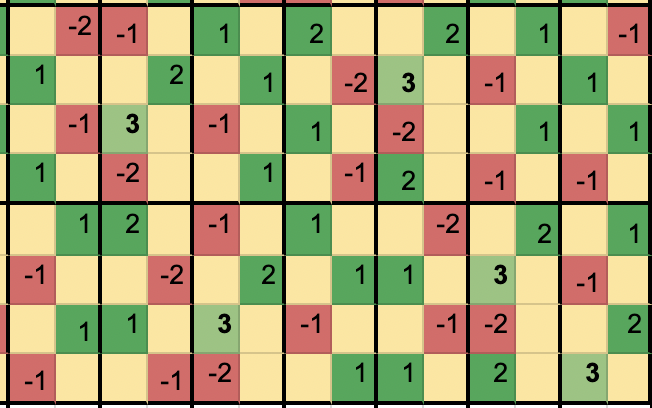
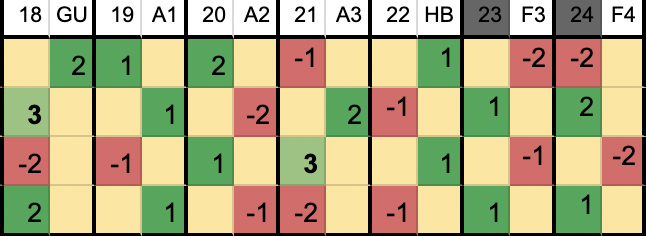
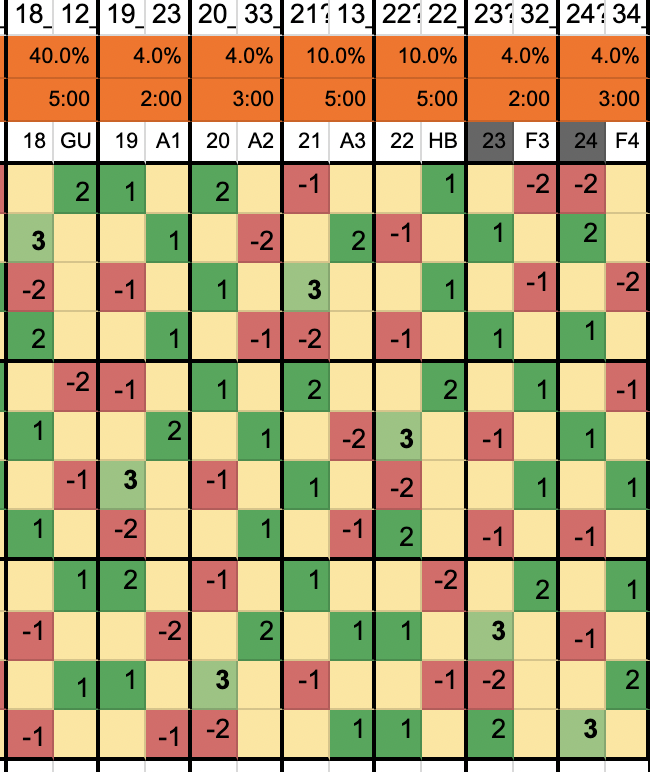

In [4]:
V.T

,Monedas,Provisiones,Cuartel Fuerza,Ordinarios Básicos,Ordinarios Refinados,Ordinarios Preciosos,Entrenamiento Fuerza,Portal,Orcos,Maná,Mercenarios Fuerza,Semillas,Sensitivos Básicos,Sensitivos Refinados,Sensitivos Preciosos,Entrenamiento Salud,Mercenarios Salud,Unurium,Ascendidos Básicos,Ascendidos Refinados,Ascendidos Preciosos,Cuartel Salud,Trabajo Comunitario,Productos en Conserva
Espora,3,0,0,1,0,0,-2,-1,0,-1,1,2,3,-1,1,0,0,0,1,2,-1,0,0,-2
Escarabanuez,2,0,0,-1,0,3,0,-1,0,-2,1,1,-2,0,0,-1,1,3,0,0,0,-1,1,2
Cascaron de Mana,1,0,3,-1,0,2,0,-2,0,0,-1,1,2,-1,1,0,0,-2,-1,1,3,0,0,0
Iris,1,0,2,-2,0,1,0,0,3,0,-1,-1,0,0,0,3,-1,2,0,0,-2,-1,1,1
Huevo,-1,3,1,0,0,1,0,0,2,0,-2,-1,1,3,-1,-2,0,0,-1,1,2,0,0,0
Lima,-1,2,1,0,3,-1,0,0,1,0,0,-2,0,-2,0,2,-1,1,0,0,0,3,-1,1
Flor de hierba mora,-2,1,-1,0,2,-1,3,0,1,0,0,0,1,2,-1,0,0,0,3,-1,1,-2,0,0
Lenguas,0,1,-1,0,1,-2,2,0,-1,3,0,0,0,0,0,1,3,1,-2,0,0,2,-1,-1
Brote ocular,0,-1,-2,0,1,0,1,3,0,2,0,0,-1,1,3,0,-2,0,2,-1,1,0,0,0
Hoja,0,-1,0,3,-1,0,1,2,-2,1,0,0,0,0,-2,1,2,-1,0,0,0,1,3,-1


In [ ]:
V.sum(axis=0)

Espora                 2
Escarabanuez           2
Cascaron de Mana       2
Iris                   2
Huevo                  2
Lima                   2
Flor de hierba mora    2
Lenguas                2
Brote ocular           1
Hoja                   2
Capullo                2
Trufa Orejera          1
dtype: int64

In [ ]:
n_diplomas = 23
opt = CauldronOptimizer(
	effect_weights=n_diplomas*[1],
	premium_ingr=[],
	alpha_UB=11,
	prob_UB=20,
)

## Test

In [15]:
alpha_best = np.array([[1,0,0,0],
                       [0,0,0,0],
                       [0,0,0,0]])
alpha_best

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
out_effects = opt.effect_probabilities(alpha_best.flatten())
order = np.argsort(out_effects)[::-1]

In [19]:
for i in order:
    effect_prob = out_effects[i]
    if effect_prob > 0.0:
        print(f"{EFFECT_NAMES[i]}: {effect_prob:.2f}%")

Monedas: 4.29%
Sensitivos Básicos: 4.29%
Ascendidos Refinados: 2.86%
Semillas: 2.86%
Ascendidos Básicos: 1.43%
Sensitivos Preciosos: 1.43%
Ordinarios Básicos: 1.43%
Mercenarios Fuerza: 1.43%
